In [ ]:
import os
%load_ext autoreload

## Setup environment specific requirements and set paths. This is to accommodate
## running from Google Colab or from a local directory

if( os.path.isdir("/content") ):
  # Setup Specific to Google Colab Environment
 
  print("Running from Google Colab Environment")
                  
  !pip install requests
  !pip install requests-oauthlib
  !pip install ratelimit
  
  from google.colab import drive
  drive.mount('/content/drive')
      
  %cd "/content/drive/My Drive/data"

  sourceDirectory = %pwd
  sourceDirectory = sourceDirectory + "/"
  #executionEnvDirectory = '/content'
  
else:
  # Setup Specific to Local Jupyter Environment
  
  print('Running from Local Jupyter Environment')
 
  sourceDirectory = "./"
  #executionEnvDirectory = "./"

## Define common  imports here

from pprint import pprint
import json
from datetime import datetime
import random
from os import listdir
from os.path import isfile, join

## We set these values so that we can reproduce our random selections. Read more about this process here: https://en.wikipedia.org/wiki/Random_seed
random_seed = 42
random.seed(random_seed) 

processStartTime = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')

Running from Google Colab Environment
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5909 sha256=3093c5b58d1b64cf51358ef1b15e8813711befa0183f734ec8551c06c8492eaf
  Stored in directory: /root/.cache/pip/wheels/5d/c2/23/4915cca200175fece0d5015f1981f4e1ecb5e3ef40b66cf525
Successfully built ratelimit
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1I_dpH1UsdsEe51FjqvFpGGykHS0-w-bm/data


In [ ]:
import datetime as dt
import pandas as pd 
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:

requestdf = pd.read_excel("/content/drive/MyDrive/data/SentimentsUpdated.xlsx")
requestdf



,Tweet ID,Conversation ID,Author ID,Lang,Likes,Replies,Retweets,SendDate,isPatois,mentioned,Cleaned_Text,Sentiment,Score,Text
0,1299469396864368896,1299469396864368896,407088463,en,0,0,0,2020-08-28 22:10:21,False,[],🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Ho...,NEGATIVE,0.582141,🇯🇲Jamaica: Latest Poll Shows Drop In Andrew Ho...
1,1299468770440876032,1299467292246446080,950587192891596800,en,3,0,3,2020-08-28 22:07:52,False,"['@PositiveOrgJA', '@Nevpositivemeds', '@chadm...",@user @user @user @user @user @user @user @use...,NEGATIVE,0.601706,@PositiveOrgJA @Nevpositivemeds @chadmorganesq...
2,1299468723535970048,1299446120402358016,1385966996,en,1,0,0,2020-08-28 22:07:41,False,"['@vocallywise1', '@jlpjamaica']",@user @user They are just wicked and disingenuous,NEGATIVE,0.792774,@vocallywise1 @jlpjamaica They are just wicked...
3,1299468577737670912,1299446120402358016,1385966996,en,0,0,0,2020-08-28 22:07:06,False,"['@jayjaybrown97', '@jlpjamaica']",@user @user They dont have the skillset to rev...,NEGATIVE,0.776306,@jayjaybrown97 @jlpjamaica They dont have the ...
4,1299468212892037120,1299467292246446080,96760834,en,2,0,1,2020-08-28 22:05:39,False,"['@PositiveOrgJA', '@chadmorganesq', '@VPAJama...",@user @user @user @user @user @user @user @use...,NEGATIVE,0.671294,@PositiveOrgJA @chadmorganesq @VPAJamaica @chr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41014,1302018465759461120,1302018465759461120,2205070984,en,486,19,29,2020-09-04 22:59:27,False,[],Thank you for your support my #EastPortland 💚 ...,POSITIVE,0.615993,Thank you for your support my #EastPortland 💚 ...
41015,1302369542547661056,1302353642528346112,976618555839057920,en,0,1,0,2020-09-05 22:14:30,False,['@kxng_geniuz'],@user It would be a amazing move who wouldn't ...,POSITIVE,0.743659,@kxng_geniuz It would be a amazing move who wo...
41016,1302344226466921984,1302344226466921984,1186363560202592000,und,3,2,0,2020-09-05 20:33:54,False,"['@Owen05437732', '@UncleBarry876', '@judzlani...",Oieee🗣 @user @user @user @user @user @user http,NEGATIVE,0.893858,Oieee🗣 @Owen05437732 @UncleBarry876 @judzlanim...
41017,1302353277837890048,1301988443141082880,1181212310997783040,en,1,1,0,2020-09-05 21:09:52,True,"['@DavidMc75880030', '@tinkabell608', '@maryse...",@user @user @user @user @user Love people that...,NEGATIVE,0.793390,@DavidMc75880030 @tinkabell608 @maryserb17 @Dr...


In [ ]:
requestdf.isnull().sum()

Tweet ID           0
Conversation ID    0
Author ID          0
Lang               0
Likes              0
Replies            0
Retweets           0
SendDate           0
isPatois           0
mentioned          0
Cleaned_Text       0
Sentiment          0
Score              0
Text               0
dtype: int64

In [ ]:
requestdf.dtypes

Tweet ID                    int64
Conversation ID             int64
Author ID                   int64
Lang                       object
Likes                       int64
Replies                     int64
Retweets                    int64
SendDate           datetime64[ns]
isPatois                     bool
mentioned                  object
Cleaned_Text               object
Sentiment                  object
Score                     float64
Text                       object
dtype: object

In [ ]:
requestdf.Sentiment= requestdf.Sentiment.astype('category')

In [ ]:
requestdf.Sentiment.dtypes

CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=False)

## **Question 1 - How the sentiments of the public evolved over time**

In [ ]:
requestdf['SendDate_Dateonly']=requestdf['SendDate'].dt.date
requestdf[['SendDate_Dateonly','SendDate']]

,SendDate_Dateonly,SendDate
0,2020-08-28,2020-08-28 22:10:21
1,2020-08-28,2020-08-28 22:07:52
2,2020-08-28,2020-08-28 22:07:41
3,2020-08-28,2020-08-28 22:07:06
4,2020-08-28,2020-08-28 22:05:39
...,...,...
41014,2020-09-04,2020-09-04 22:59:27
41015,2020-09-05,2020-09-05 22:14:30
41016,2020-09-05,2020-09-05 20:33:54
41017,2020-09-05,2020-09-05 21:09:52


In [ ]:
requestdf_Grouped_by_date = requestdf.groupby(['SendDate_Dateonly',"Sentiment"]).agg({"Sentiment":'count'})
requestdf_Grouped_by_date

Sentiment
SendDate_Dateonly Sentiment           
2020-08-11        NEGATIVE           0
                  POSITIVE           2
2020-08-12        NEGATIVE           4
                  POSITIVE           0
2020-08-13        NEGATIVE           3
...                                ...
2020-09-10        POSITIVE          82
2020-09-11        NEGATIVE         134
                  POSITIVE          41
2020-09-12        NEGATIVE          94
                  POSITIVE          68

[66 rows x 1 columns]

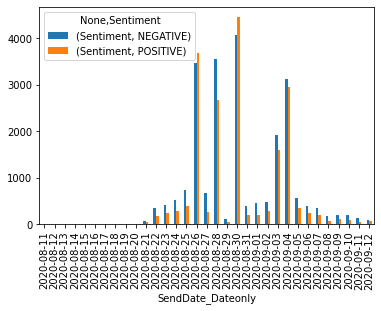

In [ ]:
requestdf_Grouped_by_date.unstack().plot.bar()

Examining Dates before August 22, since those are not visible in above graph

In [ ]:
start = '2020-08-11'
end = '2020-08-21'

start_date = date.fromisoformat(start)
end_date = date.fromisoformat(end)

date_range = [
    # end_date - timedelta(days=i)  # For date objects
    (end_date - timedelta(days=i)).isoformat()  # For ISO-8601 strings
    for i
    in range((end_date - start_date).days)
]
reverse_range = list(reversed(date_range))


In [ ]:
testdf = requestdf_Grouped_by_date.filter(items= reverse_range, axis=1)
testdf.index = testdf.index.set_names(['SendDate_Dateonly', 'Sentiment'])
testdf.reset_index(inplace=True)
testdf

,SendDate_Dateonly,Sentiment
0,2020-08-11,NEGATIVE
1,2020-08-11,POSITIVE
2,2020-08-12,NEGATIVE
3,2020-08-12,POSITIVE
4,2020-08-13,NEGATIVE
...,...,...
61,2020-09-10,POSITIVE
62,2020-09-11,NEGATIVE
63,2020-09-11,POSITIVE
64,2020-09-12,NEGATIVE


In [ ]:
testdf.dtypes

SendDate_Dateonly      object
Sentiment            category
dtype: object

In [ ]:
testdf['SendDate_Dateonly']= pd.to_datetime(testdf['SendDate_Dateonly'])

In [ ]:
testdf.drop(testdf[testdf['SendDate_Dateonly']> dt.datetime(2020,8,21)].index, inplace=True)

In [ ]:
testdf

,SendDate_Dateonly,Sentiment
0,2020-08-11,NEGATIVE
1,2020-08-11,POSITIVE
2,2020-08-12,NEGATIVE
3,2020-08-12,POSITIVE
4,2020-08-13,NEGATIVE
5,2020-08-13,POSITIVE
6,2020-08-14,NEGATIVE
7,2020-08-14,POSITIVE
8,2020-08-15,NEGATIVE
9,2020-08-15,POSITIVE


In [ ]:
testdf_Grouped_by_date = testdf.groupby(['SendDate_Dateonly',"Sentiment"]).agg({"Sentiment":'count'})
testdf_Grouped_by_date

Sentiment
SendDate_Dateonly Sentiment           
2020-08-11        NEGATIVE           1
                  POSITIVE           1
2020-08-12        NEGATIVE           1
                  POSITIVE           1
2020-08-13        NEGATIVE           1
                  POSITIVE           1
2020-08-14        NEGATIVE           1
                  POSITIVE           1
2020-08-15        NEGATIVE           1
                  POSITIVE           1
2020-08-16        NEGATIVE           1
                  POSITIVE           1
2020-08-17        NEGATIVE           1
                  POSITIVE           1
2020-08-18        NEGATIVE           1
                  POSITIVE           1
2020-08-19        NEGATIVE           1
                  POSITIVE           1
2020-08-20        NEGATIVE           1
                  POSITIVE           1
2020-08-21        NEGATIVE           1
                  POSITIVE           1

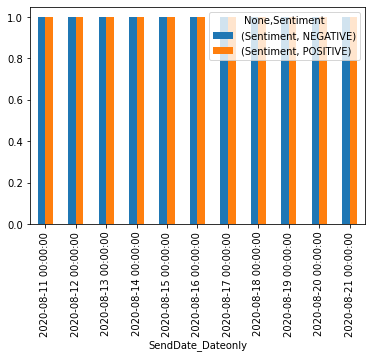

In [ ]:
testdf_Grouped_by_date.unstack().plot.bar()

There's no difference in sentiments prior to August 22, 2020

## **Question 2 - Whether the public express consistent support for one party or do their attitudes vary depending on key events such as news, scandals, debates**

Look at the entities and if a party is there group by author, sentiment and date and see if the authors sentiment remains consistent over time or changes over time. 

or just look at those tweets with a party entity and check the dominant sentiment over time. If the dominant sentiment change from time to time check to see what event was happening around that time

In [ ]:

Entitiesdf= pd.read_excel("/content/drive/MyDrive/data/Entities.xlsx") # reading in a dataframe of the entities 
Entitiesdf



,Unnamed: 0,Tweet ID,Entity
0,0,1299469396864368640,🇯🇲Jamaica
1,1,1299469396864368640,Andrew Holness
2,2,1299469396864368640,Dr. Peter Phillips
3,3,1299468770440876039,Missing
4,4,1299468723535970305,Missing
...,...,...,...
51575,51575,1302018465759461378,Missing
51576,51576,1302369542547660802,Missing
51577,51577,1302344226466922496,Missing
51578,51578,1302353277837889537,PNP


In [ ]:
Entitiesdf_2 = Entitiesdf.iloc[: , 1 :]
Entitiesdf_2

,Tweet ID,Entity
0,1299469396864368640,🇯🇲Jamaica
1,1299469396864368640,Andrew Holness
2,1299469396864368640,Dr. Peter Phillips
3,1299468770440876039,Missing
4,1299468723535970305,Missing
...,...,...
51575,1302018465759461378,Missing
51576,1302369542547660802,Missing
51577,1302344226466922496,Missing
51578,1302353277837889537,PNP


In [ ]:
TweetsID= list(requestdf['Tweet ID'].unique())

requestdf['Entities'] = ['UNKNOWN' for i in range(0, requestdf.shape[0])]

for id in TweetsID:
      Entities=list(Entitiesdf_2[Entitiesdf_2['Tweet ID']==id]['Entity'])
      requestdf.loc[requestdf['Tweet ID']== id,'Entities'] =  str(Entities)
requestdf[['Tweet ID','Entities']]

,Tweet ID,Entities
0,1299469396864368896,[]
1,1299468770440876032,[]
2,1299468723535970048,[]
3,1299468577737670912,[]
4,1299468212892037120,['Jamaica']
...,...,...
41014,1302018465759461120,[]
41015,1302369542547661056,[]
41016,1302344226466921984,[]
41017,1302353277837890048,[]


In [ ]:
requestdf.dtypes

Tweet ID                      int64
Conversation ID               int64
Author ID                     int64
Lang                         object
Likes                         int64
Replies                       int64
Retweets                      int64
SendDate             datetime64[ns]
isPatois                       bool
mentioned                    object
Cleaned_Text                 object
Sentiment                  category
Score                       float64
Text                         object
SendDate_Dateonly            object
Entities                     object
dtype: object

In [ ]:
requestdf[requestdf['Entities']=="UNKNOWN"].shape

(0, 16)

In [ ]:
requestdf['Party'] = ['UNKNOWN' for i in range(0, requestdf.shape[0])]
TweetsID = list(requestdf['Tweet ID'].unique())
parties = ['jlp', 'jamaica labour party', 'national party', 'pnp']
jlp = ['jlp', 'jamaica labour party']
pnp = ['national party', 'pnp']
for id in TweetsID:
  if any(ele in str(requestdf.loc[requestdf['Tweet ID']==id]['Entities']).lower() for ele in jlp) and any(ele in str(requestdf.loc[requestdf['Tweet ID']==id]['Entities']).lower() for ele in pnp):
    requestdf.loc[requestdf['Tweet ID']== id,'Party'] = "Unclear"
  elif any(ele in str(requestdf.loc[requestdf['Tweet ID']==id]['Entities']).lower() for ele in jlp):
     requestdf.loc[requestdf['Tweet ID']== id,'Party'] = "JLP"
  elif any(ele in str(requestdf.loc[requestdf['Tweet ID']==id]['Entities']).lower() for ele in pnp):
     requestdf.loc[requestdf['Tweet ID']== id,'Party'] = "PNP"
 


In [ ]:
requestdf.Party.unique()

array(['UNKNOWN', 'PNP', 'Unclear', 'JLP'], dtype=object)

In [ ]:
requestdf[requestdf['Party']=="PNP"]

,Tweet ID,Conversation ID,Author ID,Lang,Likes,Replies,Retweets,SendDate,isPatois,mentioned,Cleaned_Text,Sentiment,Score,Text,SendDate_Dateonly,Entities,Party
13,1299464192764841984,1299437861427654912,26819438,en,1,0,0,2020-08-28 21:49:41,False,"['@marlonmusique', '@PlunkettStephen', '@suppo...",@user @user It appears the PNP never do nothin...,NEGATIVE,0.799156,@marlonmusique @PlunkettStephen It appears the...,2020-08-28,"['PNP', 'Jamaica', 'PNP']",PNP
38,1299453505128878080,1299453505128878080,1298072392728633088,en,0,0,0,2020-08-28 21:07:12,False,['@jlpjamaica'],@user Look at how it took almost 13 years for ...,NEGATIVE,0.877033,@jlpjamaica Look at how it took almost 13 year...,2020-08-28,['PNP'],PNP
51,1299449493948162048,1299449493948162048,1298072392728633088,en,0,0,0,2020-08-28 20:51:16,False,['@jlpjamaica'],@user PNP started taking debt down \nDate Deb...,NEGATIVE,0.763993,@jlpjamaica PNP started taking debt down \nDat...,2020-08-28,['PNP'],PNP
80,1299438498152407040,1299438498152407040,448805820,en,0,1,1,2020-08-28 20:07:35,False,[],#JAMAICA: PNP General Secretary Julian Robinso...,NEGATIVE,0.743028,#JAMAICA: PNP General Secretary Julian Robinso...,2020-08-28,"['PNP General', 'Julian Robinson', 'Robinson']",PNP
163,1299404193246126080,1299000318244663040,64205574,en,0,0,0,2020-08-28 17:51:16,False,['@jlpjamaica'],"@user We are for Action Andrew, no to Passive ...",NEGATIVE,0.567915,"@jlpjamaica We are for Action Andrew, no to Pa...",2020-08-28,"['Andrew', 'Peter', 'PNP']",PNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40595,1302576366265815040,1302576366265815040,1236648392685740032,en,0,0,0,2020-09-06 11:56:21,False,[],"The immediate question for the PNP is, the ele...",POSITIVE,0.521969,"The immediate question for the PNP is, the ele...",2020-09-06,"['PNP', 'Jamaica']",PNP
40630,1302507459802669056,1302507459802669056,952746380,en,0,1,0,2020-09-06 07:22:32,False,[],"PNP has lost its way, insiders and critics agr...",NEGATIVE,0.604641,"PNP has lost its way, insiders and critics agr...",2020-09-06,"['PNP', 'Jamaica Gleaner']",PNP
40646,1302482189527941120,1298301450238545920,1229367023815320064,en,0,0,0,2020-09-06 05:42:07,False,"['@awshann', '@CVMTV']",@user @user The PNP Bush Rats can't even fix t...,NEGATIVE,0.774610,@awshann @CVMTV The PNP Bush Rats can't even f...,2020-09-06,"['PNP Bush Rats', 'Jamaica', 'Peter Phillips P...",PNP
40895,1302387089233924096,1302387089233924096,1572836917,en,3,0,0,2020-09-05 23:24:13,False,[],From I have being watching politics in Jamaica...,NEGATIVE,0.734173,From I have being watching politics in Jamaica...,2020-09-05,"['Jamaica', 'PNP']",PNP


In [ ]:
partydf = requestdf[(requestdf['Party'] == 'JLP') | (requestdf['Party']== 'PNP')]

In [ ]:
partydf.shape

(423, 17)

In [ ]:
partydf.Party= partydf.Party.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
pnpdf= partydf[(partydf['Party'] == 'PNP') & (partydf['Sentiment']== 'POSITIVE')]
jlpdf= partydf[(partydf['Party'] == 'JLP') & (partydf['Sentiment']== 'POSITIVE')]


In [ ]:
jlpdf_Grouped_by_date = jlpdf.groupby(['SendDate_Dateonly']).agg({"Sentiment":'count'})
jlpdf_Grouped_by_date

,Sentiment
SendDate_Dateonly,
2020-08-18,1
2020-08-21,1
2020-08-23,2
2020-08-25,1
2020-08-26,3
2020-08-27,1
2020-08-28,2
2020-08-30,3
2020-09-01,2


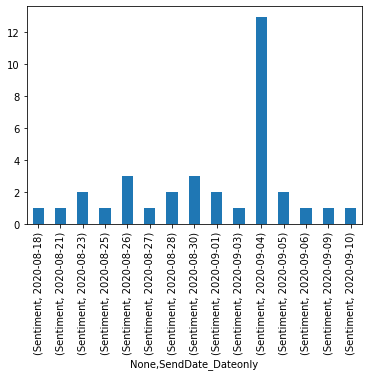

In [ ]:
jlpdf_Grouped_by_date.unstack().plot.bar()

In [ ]:
pnpdf_Grouped_by_date = pnpdf.groupby(['SendDate_Dateonly']).agg({"Sentiment":'count'})
pnpdf_Grouped_by_date

,Sentiment
SendDate_Dateonly,
2020-08-22,2
2020-08-23,1
2020-08-24,3
2020-08-25,3
2020-08-26,29
2020-08-27,5
2020-08-28,6
2020-08-30,13
2020-09-01,2


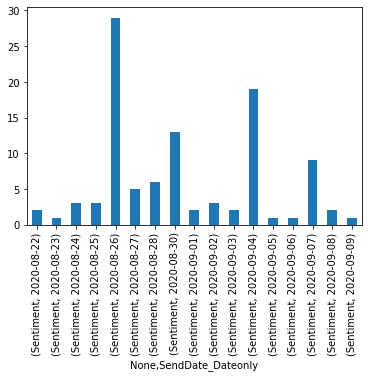

In [ ]:
pnpdf_Grouped_by_date.unstack().plot.bar()

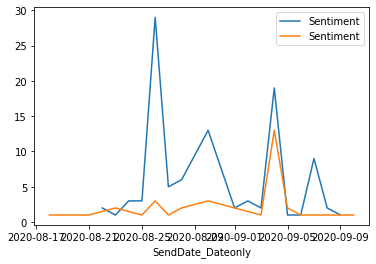

In [ ]:

ax = pnpdf_Grouped_by_date.plot()
#ax.set_xticks(ax.get_xticks()[::1])
jlpdf_Grouped_by_date.plot(ax=ax)

## **Question 3 - What percentage of the public appears to be aligned with each party**

Alligned to one party- This is true if the sentiment remains positive for all tweets by an author and the entity contains the party (JLP or PNP).




In [ ]:
public_total_count = requestdf['Author ID'].nunique()
party_aligned_df = partydf.groupby(['Author ID','Party', 'Sentiment']).agg({'Tweet ID':'nunique'})
party_aligned_df

Tweet ID
Author ID           Party Sentiment          
1536471             JLP   NEGATIVE          0
                          POSITIVE          0
                    PNP   NEGATIVE          0
                          POSITIVE          1
14083602            JLP   NEGATIVE          0
...                                       ...
1299224503260598016 PNP   POSITIVE          0
1299903088644496896 JLP   NEGATIVE          0
                          POSITIVE          1
                    PNP   NEGATIVE          0
                          POSITIVE          0

[1308 rows x 1 columns]

In [ ]:
partydf['ALIGNED'] = ['NEUTRAL' for i in range(0, partydf.shape[0])]

for auth_id in party_aligned_df.index.values:
    #print(auth_id[0])
    #print(party_aligned_df.loc[(auth_id[0])])
    JLP = party_aligned_df.loc[(auth_id[0])].loc['JLP']
    PNP = party_aligned_df.loc[(auth_id[0])].loc['PNP']
    jlp_aligned = (JLP.loc['POSITIVE']['Tweet ID'] > 0) and (JLP.loc['NEGATIVE']['Tweet ID'] == 0)
    pnp_aligned = (PNP.loc['POSITIVE']['Tweet ID'] > 0) and (PNP.loc['NEGATIVE']['Tweet ID'] == 0)

    if not (jlp_aligned and pnp_aligned):
      if jlp_aligned:
          # print('jlp aligned')
          partydf.loc[partydf['Author ID'] == auth_id[0], 'ALIGNED'] = 'JLP'
      if pnp_aligned:
          #print('pnp aligned')
          partydf.loc[partydf['Author ID'] == auth_id[0], 'ALIGNED'] = 'PNP'
    
    #print(partydf.loc[partydf['Author ID'] == auth_id[0]]['ALIGNED'])



In [ ]:


jlp_percentage = partydf[partydf['ALIGNED'] == 'JLP']['Author ID'].nunique()/(public_total_count)
pnp_percentage = partydf[partydf['ALIGNED'] == 'PNP']['Author ID'].nunique()/(public_total_count)


print("{:.2%} of the public aligned with JLP".format(jlp_percentage))
print("{:.2%} of the public aligned with PNP".format(pnp_percentage))




0.35% of the public aligned with JLP
0.88% of the public aligned with PNP


## **Question 4-What percentage of the public appears to be neutral**

In [ ]:
requestdf.Sentiment.dtypes

CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=False)

As seen above, there are no neutral sentintements within the dataframe.

## **Question 5 -What level of discussion/debates take place between individuals with opposing views**

Looking at tweets that have the same conversation id (discussion) and the tweet is about a party

In [ ]:
partydf['Conversation ID'].nunique()

412

In [ ]:
disc = partydf.groupby('Conversation ID').filter(lambda x: len(x)>1).head(35)


In [ ]:
disc

,Tweet ID,Conversation ID,Author ID,Lang,Likes,Replies,Retweets,SendDate,isPatois,mentioned,Cleaned_Text,Sentiment,Score,Text,SendDate_Dateonly,Entities,Party
521,1299307373874511872,1299186681468289024,873568304,en,0,1,0,2020-08-28 11:26:32,False,['@JamaicaGleaner'],@user We Dr Clarke talked about the high tax o...,NEGATIVE,0.758099,@JamaicaGleaner We Dr Clarke talked about the ...,2020-08-28,"['Dr Clarke', 'IMF', 'Jamaica', 'PNP', 'IMF']",PNP
529,1299301767042170880,1299186681468289024,927573758369521664,en,4,0,0,2020-08-28 11:04:15,True,['@JamaicaGleaner'],"@user Y wen unuh post a poll, even wen the win...",NEGATIVE,0.783712,"@JamaicaGleaner Y wen unuh post a poll, even w...",2020-08-28,"['PNP', 'Jamaica']",PNP
647,1299215693024555008,1299187700445176064,1235955152005328896,en,2,0,0,2020-08-28 05:22:14,False,"['@st_western', '@JamaicaPNP', '@KhiaJosina', ...",@user @user @user @user All PNP want is a head...,POSITIVE,0.526487,@st_western @JamaicaPNP @KhiaJosina @MarkJGold...,2020-08-28,['PNP'],PNP
909,1299196650192343040,1299187700445176064,1293360493231582976,en,0,0,0,2020-08-28 04:06:33,False,"['@JamaicaPNP', '@MarkJGolding']",@user @user Substance over form is most import...,NEGATIVE,0.887151,@JamaicaPNP @MarkJGolding Substance over form ...,2020-08-28,"['JLP', 'Jamaica']",JLP
7127,1298788237272666112,1298785943055405056,1181212310997783040,en,5,0,2,2020-08-27 01:03:40,False,['@jlpjamaica'],@user @user PNP not thinking past sep 3. The p...,POSITIVE,0.570824,@5Solae @jlpjamaica PNP not thinking past sep ...,2020-08-27,['PNP'],PNP
7144,1298785943055405056,1298785943055405056,203193300,en,56,1,29,2020-08-27 00:54:33,False,['@jlpjamaica'],I hear talk of comparing the PNP’s TAX plan to...,NEGATIVE,0.753691,I hear talk of comparing the PNP’s TAX plan to...,2020-08-27,"['PNP', 'Jamaica']",PNP
7938,1298503791705300992,1298364530393719040,425159833,en,0,0,0,2020-08-26 06:13:23,False,"['@JamaicaGleaner', '@JamaicaPNP']",@user @user At this point no one in the world ...,NEGATIVE,0.746414,@JamaicaGleaner @JamaicaPNP At this point no o...,2020-08-26,"['PNP', 'PNP', 'PNP']",PNP
14503,1298386959887405056,1298364530393719040,1297527617013394944,en,3,0,0,2020-08-25 22:29:08,False,"['@JamaicaGleaner', '@feisty_red88', '@Jamaica...",@user @user @user So when pnp was calling for ...,NEGATIVE,0.644291,@JamaicaGleaner @feisty_red88 @JamaicaPNP So w...,2020-08-25,['pnp'],PNP
14900,1298293333698260992,1297991535305338880,1254998101326278912,en,0,1,0,2020-08-25 16:17:06,False,"['@LAndreaj86', '@JamaicaPNP', '@DamionCrawford']",@user @user @user Jamaica would be the top Car...,NEGATIVE,0.836390,@LAndreaj86 @JamaicaPNP @DamionCrawford Jamaic...,2020-08-25,"['Jamaica', 'JLP Seaga', 'Anju']",JLP
15027,1298274672283353088,1297991535305338880,1014567080899816960,en,0,0,0,2020-08-25 15:02:57,False,"['@tafyou', '@jeromebronn', '@JamaicaPNP', '@D...",@user @user @user @user What is not fair is to...,NEGATIVE,0.649786,@tafyou @jeromebronn @JamaicaPNP @DamionCrawfo...,2020-08-25,['PNP'],PNP


In [ ]:
discussion_Grouped = disc.groupby(['Conversation ID',"Party","Sentiment"]).agg({"Sentiment":'count'})
discussion_Grouped 

Sentiment
Conversation ID     Party Sentiment           
1297217940102828032 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           1
                          POSITIVE           1
1297991535305338880 JLP   NEGATIVE           1
                          POSITIVE           0
                    PNP   NEGATIVE           2
                          POSITIVE           0
1298364530393719040 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           2
                          POSITIVE           0
1298785943055405056 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           1
                          POSITIVE           1
1299186681468289024 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           2
                          POSITIVE           0
1299187700445176064 JLP   NEGATIVE           1
                          POSITIVE           0
                    PNP   NEGATIVE           0
                          POSITIVE           1
1300607463079763968 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           1
                          POSITIVE           1
1301924968440233984 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           2
                          POSITIVE           0
1304070933578211072 JLP   NEGATIVE           0
                          POSITIVE           0
                    PNP   NEGATIVE           3
                          POSITIVE           0

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 180, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 168, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4859, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 3628, in insert
    self._mgr.insert(loc, column, value, allow_duplicates=allow_duplicates)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py", line 1186, in insert
    raise ValueError(f"cannot insert {item}, already exists")
ValueError: cannot insert Sentiment, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 192, in _repr_javascrip

From eyeballing the above 9 conversations, it is seen where only 2 of the 9 conversations were between individuals of opposing view ( conversation IDS 1297217940102828032 and 1298785943055405056)

## **Question 6 - What level of influence do people have within the discourse**

Getting the top 5 authors sorted by number of likes, replies and retweets

In [ ]:
requestdf.groupby(['Author ID']).agg({'Likes': 'sum', 'Replies': 'sum','Retweets': 'sum'}).sort_values(["Likes"], ascending=False)[:6]

,Likes,Replies,Retweets
Author ID,,,
25073877,283993,63013,70731
142116606,255177,2194,48799
902834125,166444,739,53704
3408716145,139122,684,33464
878247600096509952,126199,5270,43551
14642495,112089,3211,3362


In [ ]:
requestdf.groupby(['Author ID']).agg({'Likes': 'sum', 'Replies': 'sum','Retweets': 'sum'}).sort_values(["Replies"], ascending=False)[:6]

,Likes,Replies,Retweets
Author ID,,,
25073877,283993,63013,70731
716688050,9833,7806,1367
35586563,27855,5854,2708
878247600096509952,126199,5270,43551
40954616,16339,3560,8156
14642495,112089,3211,3362


In [ ]:
requestdf.groupby(['Author ID']).agg({'Likes': 'sum', 'Replies': 'sum','Retweets': 'sum'}).sort_values(["Retweets"], ascending=False)[:6]

,Likes,Replies,Retweets
Author ID,,,
25073877,283993,63013,70731
902834125,166444,739,53704
142116606,255177,2194,48799
878247600096509952,126199,5270,43551
19658826,77219,692,35024
3408716145,139122,684,33464
